In [1]:
from gensim.models import Word2Vec
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from collections import Counter
from ICT_202_preprocessing import *

In [2]:
df = pd.read_json('full_data_lemmatised.json')
docs = [doc.split() for doc in df['content']]

In [3]:
model = Word2Vec(sentences=docs, vector_size=100, window=5, min_count=1, workers=4)

In [13]:
Counter(docs).most_common(20) # I edited this bit here after it was working and made it not work 

TypeError: unhashable type: 'list'

In [90]:
for word in [doc[0] for doc in Counter(pipe([docs2])[0].split()).most_common(20)]:
    print(word)
    print(', '.join([term[0] for term in model.wv.most_similar(word)]))

vaccine
vax, jab, injection, vaccination, shot, vaxx, treatment, long, which, infection
covid
even, covid19, disease, it, virus, then, treatment, knowingly, while, and
I
never, sure, just, everyone, ve, ill, ever, you, she, yes
get
catch, pass, take, contract, give, while, or, leave, but, yet
people
ppl, those, person, folk, everyone, kid, americans, someone, elderly, unvaccinated
vaccinate
vaxxed, vaxxe, infect, vaccinated, vaxe, sick, unvaccinated, unvaxxed, vaxd, vaccinatedand
covid19
covid, pregnancy, prior, drive, biontechpfizer, available, babys, offer, status, benefit
vaccination
testing, infection, vaccine, protection, vax, jab, antibody, future, travel, lockdown
death
case, number, occur, mortality, quarter, unvaccinate, 01, vast, vaccinated, low
say
admit, claim, tell, see, think, mean, mention, believe, prove, happen
take
get, leave, pass, give, force, without, want, accept, inject, refuse
know
think, see, mean, tell, believe, understand, realize, have, mention, wonder
go
tr

In [11]:
model.wv.most_similar('pfizer',topn=20)

[('document', 0.9389965534210205),
 ('release', 0.9244369268417358),
 ('doc', 0.8914285898208618),
 ('trial', 0.8900941014289856),
 ('95', 0.8750494718551636),
 ('effective', 0.8646969795227051),
 ('phizer', 0.8641158938407898),
 ('fda', 0.8639872670173645),
 ('study', 0.8626492023468018),
 ('jabinduce', 0.8618476986885071),
 ('exonerate', 0.8604724407196045),
 ('dump', 0.8580099940299988),
 ('datum', 0.8502120971679688),
 ('mrna', 0.8445207476615906),
 ('peruse', 0.8422074317932129),
 ('documentation', 0.8373411297798157),
 ('confidential', 0.8371465802192688),
 ('beast', 0.8371453285217285),
 ('reaction', 0.8358897566795349),
 ('pfizerdocument', 0.8340529799461365)]

In [88]:
[term[0] for term in model.wv.most_similar('covid')]

['even',
 'covid19',
 'disease',
 'it',
 'virus',
 'then',
 'treatment',
 'knowingly',
 'while',
 'and']

In [101]:
[term[0] for term in Counter(re.findall(r'@\w+',docs2)).most_common(20)]

['@realcandaceo',
 '@nathaliejacoby1',
 '@therealrhllor',
 '@whitehouse',
 '@sentedcruz',
 '@potus',
 '@repvaldemings',
 '@thrasherxy',
 '@justintrudeau',
 '@bucksexton',
 '@leovaradkar',
 '@dfisman',
 '@ap',
 '@houstonchron',
 '@bogochisaac',
 '@backtolife2022',
 '@kreekcraft',
 '@vp',
 '@foxnews',
 '@caylajharris']

In [117]:
def pipe2(data):
    a = make_bigrams(data)
    a = make_bigrams(a)
    a,_ = number_culler([' '.join(doc) for doc in a])
    a,_ = tag_culler(a)
    return a

In [129]:
docs4 = [' '.join(doc.split()) for doc in pipe2(docs)]

In [122]:
pd.DataFrame([' '.join(doc.split()) for doc in pipe2(docs)],columns=['content']).to_json('post_process_data.json')

In [131]:
docs5 = [doc for doc in docs4 if len(doc) >3 or '_' in doc]

In [133]:
len(docs5)

32602

In [134]:
pd.DataFrame(docs5,columns=['content']).to_json('post_process_data.json')

In [138]:
model.wv.most_similar('politician')

[('ignorant', 0.9948082566261292),
 ('responsibility', 0.9918755888938904),
 ('oppose', 0.9917954802513123),
 ('stand', 0.9908318519592285),
 ('excuse', 0.9905350804328918),
 ('ridiculous', 0.9890947937965393),
 ('power', 0.9888625741004944),
 ('ability', 0.9882678985595703),
 ('play', 0.9880475401878357),
 ('evil', 0.9878570437431335)]

In [142]:
X = model.wv[model.wv.key_to_index]

In [157]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

result = pca.fit_transform(X)

pca_df = pd.DataFrame(result, columns = ['x','y'])
pca_df['word'] = list(model.wv.key_to_index.keys())


In [164]:
pca_top_df = pca_df.loc[pca_df['word'].isin([term[0] for term in Counter(pipe([docs2])[0]).most_common(20)])]
pca_top_df

,x,y,word
0,7.491768,2.803157,vaccine
1,7.572359,3.883797,covid
2,6.973493,3.772693,I
3,7.841083,4.576263,get
4,7.428273,4.106063,people
5,7.932818,4.690097,vaccinate
6,7.850732,0.905860,covid19
7,7.721835,2.067945,vaccination
8,8.780031,2.476595,death
9,6.199559,2.122953,say


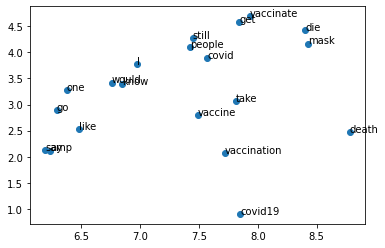

In [175]:

# create a scatter plot of the projection
plt.scatter(pca_top_df['x'], pca_top_df['y'])
words = pca_top_df['word'].to_list()

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()